# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 22.4 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/wsuser/pip-install-qhjw4n4q/tensorflow-gpu_ba3154e6c5d44c21bcd5bcd955fccf11/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess,

Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/wsuser/pip-install-qhjw4n4q/tensorflow-gpu_ba3154e6c5d44c21bcd5bcd955fccf11/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem 

In [ ]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
aiohttp                       3.8.1
aiosignal                     1.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
assetframe-lib                0.1.5
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
attrs                         21.4.0
autoai-libs                   1.14.10
autoai-ts-libs                2.0.13
autovizwidget                 0.20.0
av                            9.2.0
azure-core                    1.25.0
azure-cosmos                  4.3.0
backcall                      0.2.0
beautifulsoup4                4.11.1
black                         22.6.0
blinker                       1.4
bokeh                         2.4.3
boto3                         1.24.28
botocore                      1.27.28
Bottleneck                    1.3.5


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Load Data

In [ ]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.8 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110703 sha256=e26c29da54a42f011d907a9942c43c63f529960026883513807f53e1f269ecb5
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle


In [ ]:
# download dataset and extract it
! export KAGGLE_USERNAME="user name nya sendiri" && export KAGGLE_KEY="silahkan masukan api key nya" && kaggle datasets download --unzip ahmadimamkhofi/happysad
! ls43aaab474a1672780c

 73%|███████████████████████████▋          | 49.0M/67.2M [00:01<00:00, 39.4MB/s]
100%|██████████████████████████████████████| 67.2M/67.2M [00:01<00:00, 51.6MB/s]
kaggle


In [ ]:
! pwd && ls
print("\nFolders(classess) in training folder: ...")
! cd asl_alphabet_train && ls

/home/wsuser/work
kaggle

Folders(classess) in training folder: ...
/usr/bin/sh: line 0: cd: asl_alphabet_train: No such file or directory


In [ ]:
import cv2
import imghdr

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('kaggle/data')

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

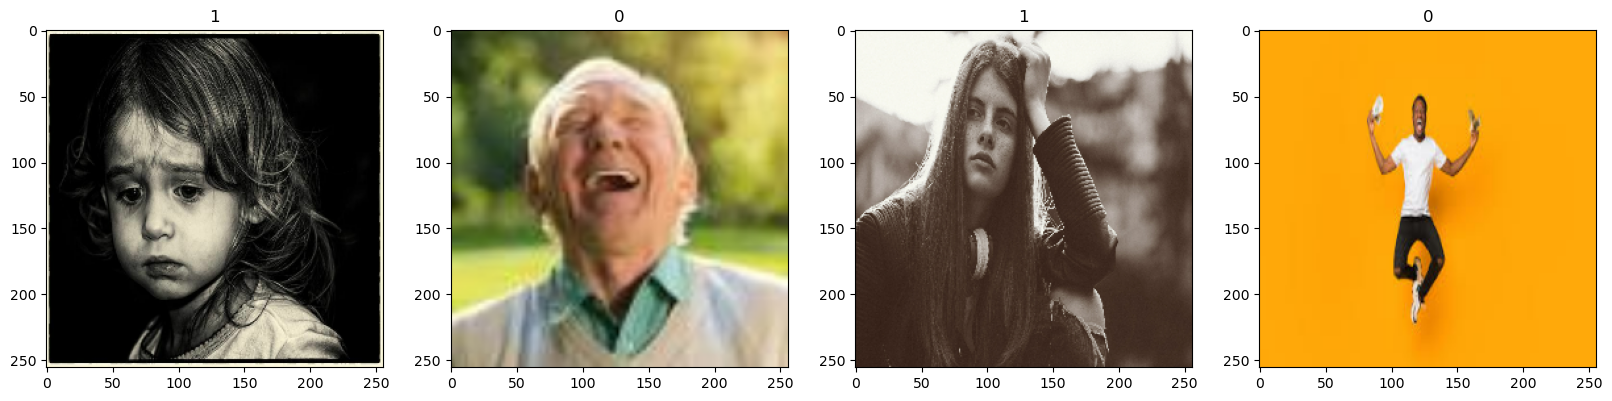

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.9015548 , 0.8701823 , 0.9290058 ],
          [0.89411765, 0.8666667 , 0.92941177],
          [0.8980392 , 0.8627451 , 0.92941177],
          ...,
          [0.68235296, 0.7294118 , 0.89411765],
          [0.6901961 , 0.7254902 , 0.89411765],
          [0.6807598 , 0.72389704, 0.9003676 ]],
 
         [[0.8811351 , 0.84976256, 0.9085861 ],
          [0.8877604 , 0.84462315, 0.91007197],
          [0.88410693, 0.83799785, 0.90736824],
          ...,
          [0.6811351 , 0.72819394, 0.8928998 ],
          [0.6901961 , 0.7254902 , 0.89411765],
          [0.6824724 , 0.723174  , 0.89720887]],
 
         [[0.829205  , 0.82339156, 0.88235295],
          [0.8273131 , 0.81960785, 0.8842448 ],
          [0.8312347 , 0.81757814, 0.88830423],
          ...,
          [0.6784314 , 0.7254902 , 0.8901961 ],
          [0.6862745 , 0.72156864, 0.8901961 ],
          [0.6862745 , 0.72156864, 0.8901961 ]],
 
         ...,
 
         [[0.74888176, 0.7764706 , 0.96267617],
          [0.76501

# 4. Split Data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.2)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 0.7522 - accuracy: 0.5268 - val_loss: 0.6637 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.5680 - accuracy: 0.6607 - val_loss: 0.5728 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.4639 - accuracy: 0.7991 - val_loss: 0.4251 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.3747 - accuracy: 0.8616 - val_loss: 0.2073 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.2130 - accuracy: 0.9196 - val_loss: 0.1843 - val_accuracy: 0.9688
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.1383 - accuracy: 0.9554 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.1494 - accuracy: 0.9375 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 8/20
7/7 [===================

# 7. Plot Performance

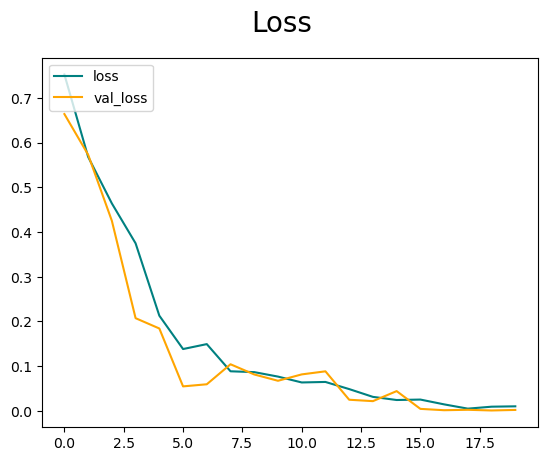

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

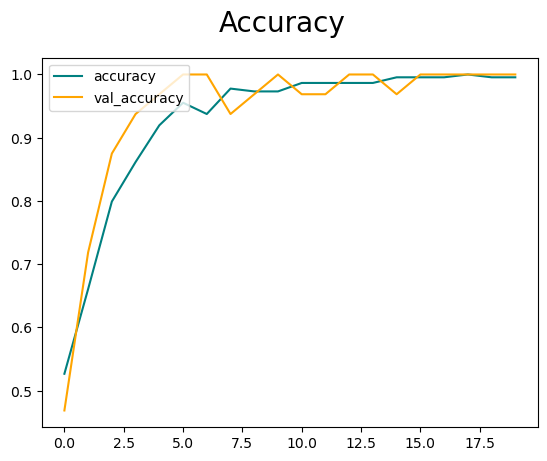

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 204ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 9. Test

In [ ]:
import cv2

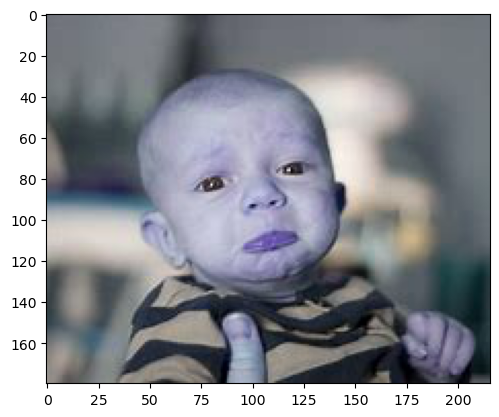

In [ ]:
img = cv2.imread('kaggle/contoh bahagia.jpg')
plt.imshow(img)
plt.show()

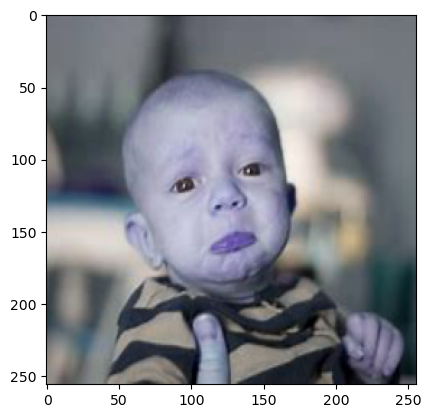

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
yhat

array([[0.99587524]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
